In [30]:
# In SIC/notebooks/eda.ipynb

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import seaborn as sns

from pathlib import Path

# Correct relative path (go one level up from notebooks to SIC, then into data/seg_train)
data_dir = Path('../data/seg_train/seg_train')

# Get the class names from the folder names
class_names = sorted([p.name for p in data_dir.iterdir() if p.is_dir()])
print(f"Found {len(class_names)} classes: {class_names}")


Found 6 classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


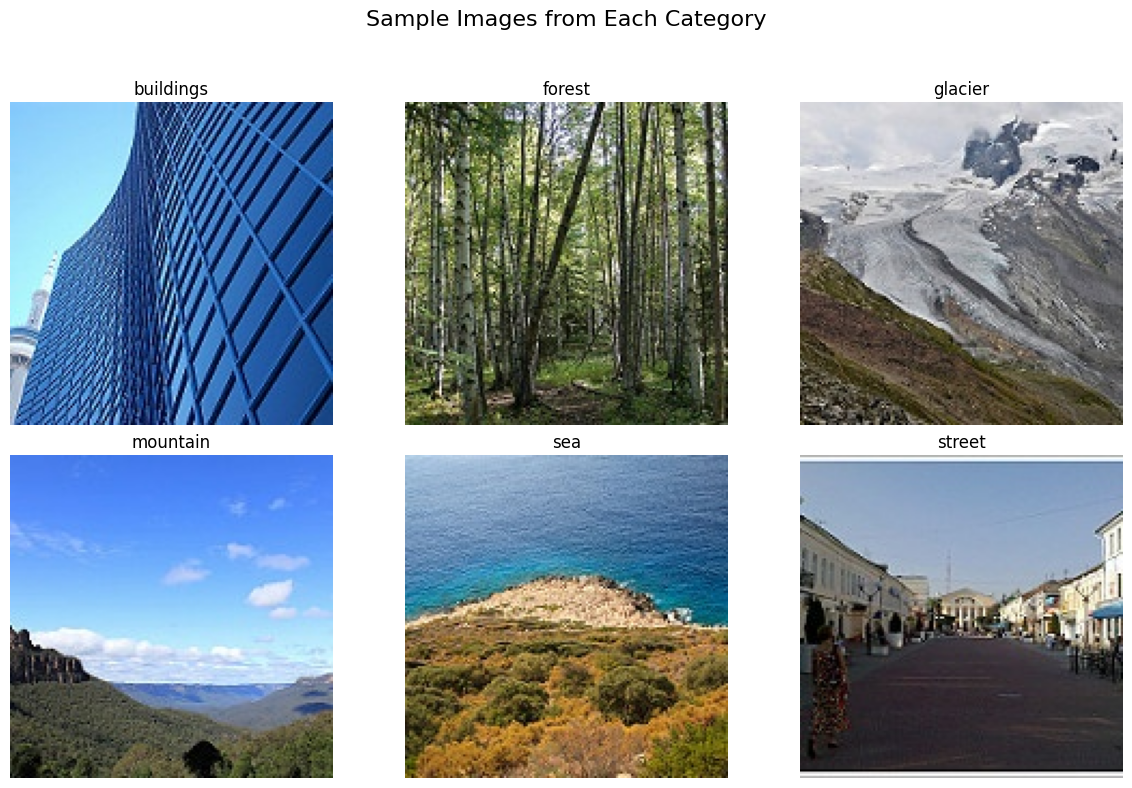

In [31]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Ensure we have exactly 6 categories
assert len(class_names) == 6, f"Expected 6 classes, found {len(class_names)}"

# Create 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Sample Images from Each Category', fontsize=16)

# Flatten axes
axes = axes.flatten()

# Loop through each class and display one random image
for i, class_name in enumerate(class_names):
    class_dir = data_dir / class_name
    image_files = list(class_dir.glob('*.jpg'))
    if not image_files:
        axes[i].set_title(f"{class_name}\n(No Images)", fontsize=10)
        axes[i].axis('off')
        continue

    random_image_path = random.choice(image_files)
    img = Image.open(random_image_path)

    axes[i].imshow(img)
    axes[i].set_title(class_name, fontsize=12)
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()


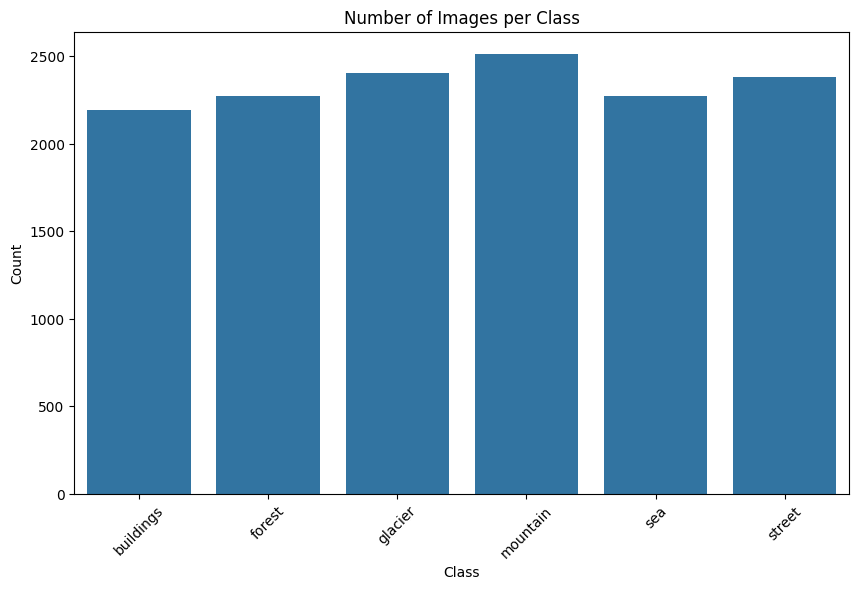

Image counts per class:
- buildings: 2191
- forest: 2271
- glacier: 2404
- mountain: 2512
- sea: 2274
- street: 2382


In [32]:
# In SIC/notebooks/eda.ipynb

class_counts = {class_name: len(list((data_dir / class_name).glob('*.jpg'))) for class_name in class_names}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Image counts per class:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count}")

In [33]:
# In SIC/notebooks/eda.ipynb

print("Checking image dimensions for a few random samples:")
for i in range(5):
    class_name = random.choice(class_names)
    class_dir = data_dir / class_name
    image_files = list(class_dir.glob('*.jpg'))
    random_image_path = random.choice(image_files)
    
    with Image.open(random_image_path) as img:
        print(f"- {random_image_path.name} (class: {class_name}): {img.size}")

Checking image dimensions for a few random samples:
- 5516.jpg (class: sea): (150, 150)
- 5161.jpg (class: street): (150, 150)
- 9444.jpg (class: mountain): (150, 150)
- 6636.jpg (class: street): (150, 150)
- 19886.jpg (class: street): (150, 150)


In [ ]:
# In SIC/notebooks/eda.ipynb

# --- CELL 5: Analyze Image Brightness ---
print("Analyzing brightness distribution...")

brightness_values = []
# We'll sample 500 images to keep this fast
for i in range(500):
    class_name = random.choice(class_names)
    class_dir = data_dir / class_name
    image_files = list(class_dir.glob('*.jpg'))
    random_image_path = random.choice(image_files)
    
    with Image.open(random_image_path) as img:
        # Convert to grayscale to measure brightness
        grayscale_img = img.convert('L')
        img_array = np.array(grayscale_img)
        # Append the mean brightness of the image
        brightness_values.append(img_array.mean())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(brightness_values, kde=True, bins=30)
plt.title('Distribution of Average Image Brightness')
plt.xlabel('Average Pixel Intensity (0=Black, 255=White)')
plt.ylabel('Frequency')
plt.show()

Analyzing brightness distribution...


Analyzing RGB color channels for a sample image...


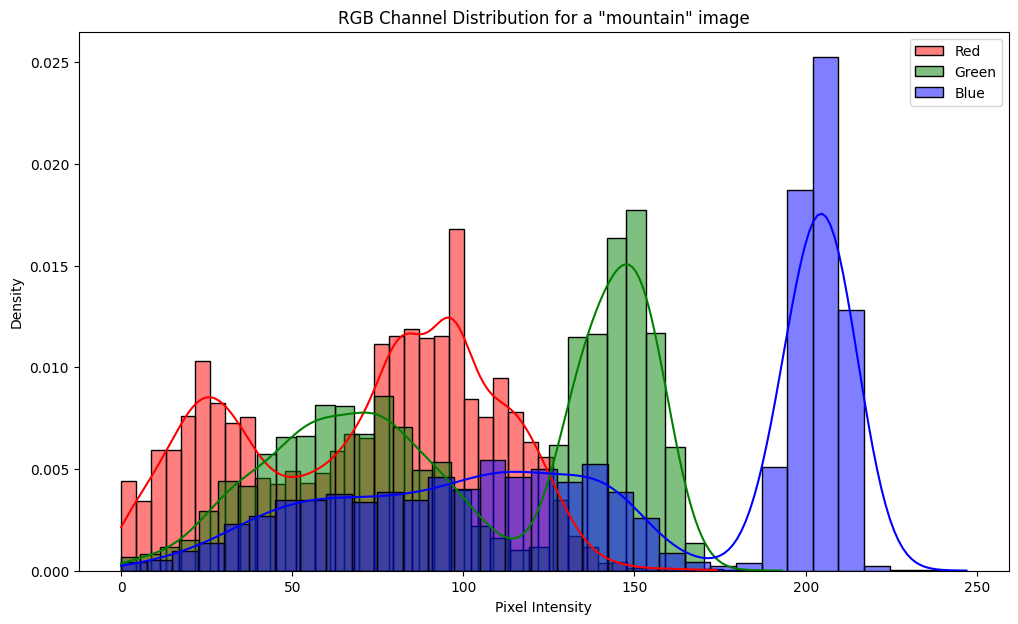

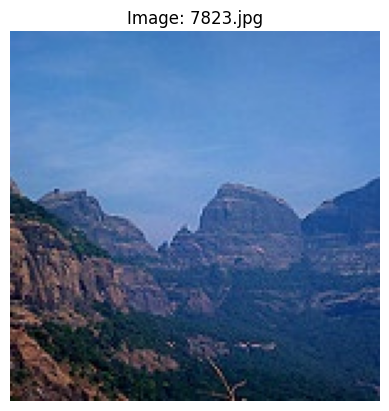

In [ ]:
# In SIC/notebooks/eda.ipynb

# --- CELL 6: Analyze Color Channels ---
print("Analyzing RGB color channels for a sample image...")

# Pick one random image to analyze
class_name = random.choice(class_names)
class_dir = data_dir / class_name
image_files = list(class_dir.glob('*.jpg'))
random_image_path = random.choice(image_files)

with Image.open(random_image_path) as img:
    img_array = np.array(img)
    
    # Separate the channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    
    # Plot histograms for each channel
    plt.figure(figsize=(12, 7))
    sns.histplot(r.flatten(), color='red', label='Red', kde=True, stat="density", common_norm=False)
    sns.histplot(g.flatten(), color='green', label='Green', kde=True, stat="density", common_norm=False)
    sns.histplot(b.flatten(), color='blue', label='Blue', kde=True, stat="density", common_norm=False)
    plt.title(f'RGB Channel Distribution for a "{class_name}" image')
    plt.xlabel('Pixel Intensity')
    plt.legend()
    plt.show()

    # Display the image we analyzed
    plt.imshow(img)
    plt.title(f'Image: {random_image_path.name}')
    plt.axis('off')
    plt.show()

In [ ]:
# In SIC/notebooks/eda.ipynb

# --- CELL 7: Check for Corrupted Images ---
from tqdm import tqdm

print("Performing data integrity check...")
corrupted_files = []
all_image_files = list(data_dir.glob('*/*.jpg'))

for image_path in tqdm(all_image_files, desc="Checking images"):
    try:
        with Image.open(image_path) as img:
            # We try to load the image data to ensure it's not truncated
            img.load() 
    except (IOError, OSError) as e:
        print(f"\nFound corrupted file: {image_path}")
        corrupted_files.append(image_path)

if not corrupted_files:
    print("\nData integrity check passed. No corrupted images found! ✅")
else:
    print(f"\nFound {len(corrupted_files)} corrupted files.")
    # In a real scenario, you would add code here to delete or fix these files.